<a href="https://colab.research.google.com/github/dgmyaing/the_bootstrap/blob/main/Bootstrap_Q1_%26_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Work for Q1 below

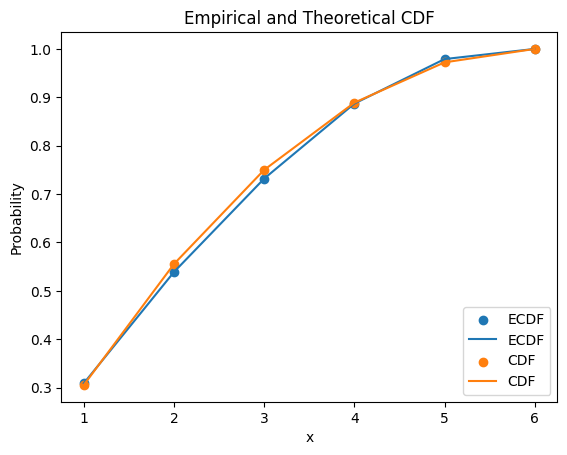

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

faces = np.array([1,2,3,4,5,6])

var = np.zeros(6)
for i in range(6):
    for j in range(6):
        min_ij = np.min([faces[i],faces[j]])
        var[min_ij-1] += 1
var = var/36
cdf = np.cumsum(var)

# Bootstrap part:
N = 1000
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
min_roll = [ min([d1[i], d2[i]]) for i in range(N) ]

ecdf = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( min_roll <= faces[i] )

# To compare...
plt.scatter(faces,ecdf,label='ECDF')
plt.plot(faces,ecdf,label='ECDF')
plt.scatter(faces,cdf,label='CDF')
plt.plot(faces,cdf,label='CDF')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()

Expected value:  3.5126


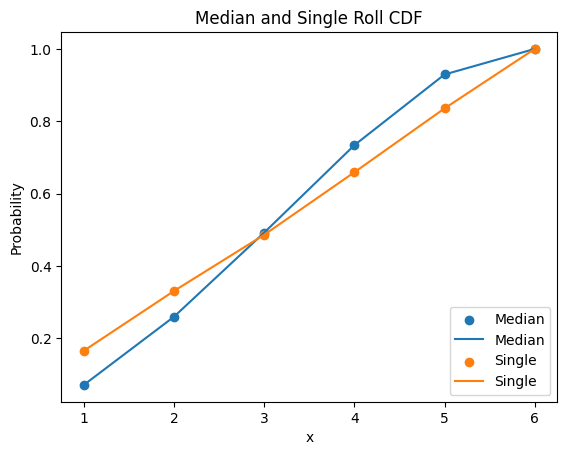

In [2]:
faces = np.array([1,2,3,4,5,6])
N = 5000
d1 = np.random.choice(faces, size=N)
d2 = np.random.choice(faces, size=N)
d3 = np.random.choice(faces, size=N)
median_roll = [ int(np.median([d1[i], d2[i], d3[i]])) for i in range(N) ]

expected_value = np.sum(median_roll)/N
print('Expected value: ', expected_value)

ecdf = np.zeros(6)
single = np.zeros(6)
for i in range(6):
    ecdf[i] = (1/N)*np.sum( median_roll <= faces[i] )
    single[i] = (1/N)*np.sum( d1 <= faces[i] )

expected_value = np.sum(median_roll)/N

# To compare...
plt.scatter(faces,ecdf,label='Median')
plt.plot(faces,ecdf,label='Median')
plt.scatter(faces,single,label='Single')
plt.plot(faces,single,label='Single')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Median and Single Roll CDF')
plt.show()

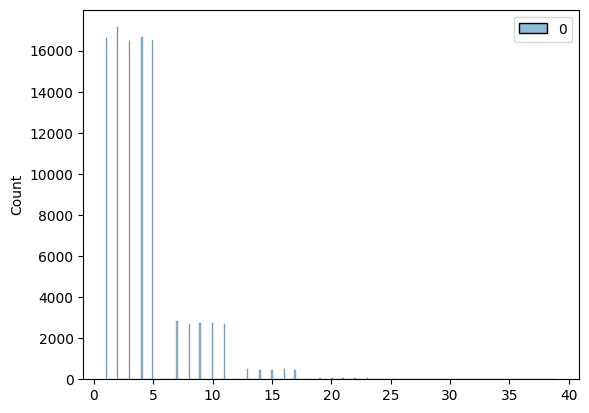

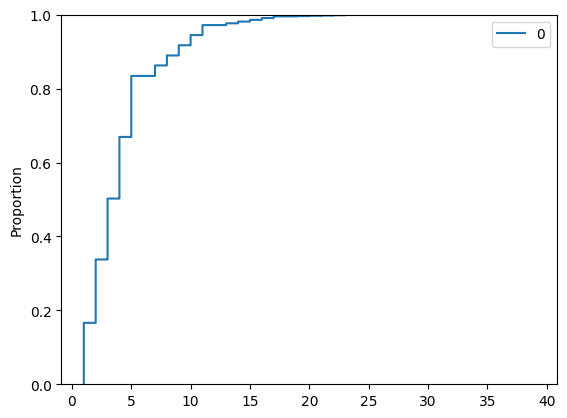

                  0
count  100000.00000
mean        4.18631
std         3.25692
min         1.00000
25%         2.00000
50%         3.00000
75%         5.00000
max        39.00000


In [10]:
N = 100000
results = []
for i in range(N):
    feeling_lucky = True
    sum = 0
    while feeling_lucky is True:
        roll = np.random.choice(faces, size=1)
        sum += roll
        if roll < 6:
            feeling_lucky = False
            results.append(int(sum[0]))

results = pd.DataFrame(results)
sns.histplot(results)
plt.show()
sns.ecdfplot(results)
plt.show()
print(results.describe())

Work for Q3 below

outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143 

outcome    failure  success  All
treatment                       
lifestyle      109      125  234
met            120      112  232
rosi            90      143  233
All            319      380  699 

outcome     failure   success       All
treatment                              
lifestyle  0.155937  0.178827  0.334764
met        0.171674  0.160229  0.331903
rosi       0.128755  0.204578  0.333333
All        0.456366  0.543634  1.000000 

lifestyle success rate:  0.5341880341880342 

metformin success rate:  0.4827586206896552 

rosiglitazone success rate:  0.6137339055793991 



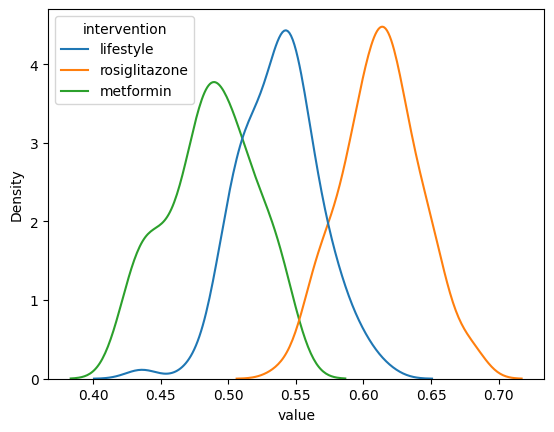

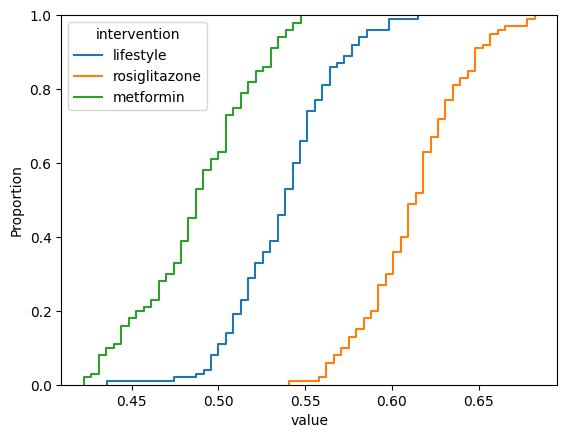

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/dgmyaing/the_bootstrap/refs/heads/main/data/diabetes_hw.csv')
df.head()

df['success'] = 0
df.loc[df['outcome']=='success','success'] = 1

# Part 1
print(pd.crosstab(df['treatment'], df['outcome']), '\n')
print(pd.crosstab(df['treatment'], df['outcome'], margins=True), '\n')
print(pd.crosstab(df['treatment'], df['outcome'], margins=True, normalize=True), '\n')

# Part 2
print('lifestyle success rate: ', 125/(125+109), '\n')
print('metformin success rate: ', 112/(112+120), '\n')
print('rosiglitazone success rate: ', 143/(143+90), '\n')
# Part 3
df_lif = df.loc[ df['treatment'] == 'lifestyle', :]
df_ros = df.loc[ df['treatment'] == 'rosi', :]
df_met = df.loc[ df['treatment'] == 'met', :]

S = 100
fx_lif = []
fx_ros = []
fx_met = []
for t in range(S):
    df_lif_t = df_lif.sample( df_lif.shape[0], axis=0, replace=True)
    df_ros_t = df_ros.sample( df_ros.shape[0], axis=0, replace=True)
    df_met_t = df_met.sample( df_met.shape[0], axis=0, replace=True)
    #
    fx_lif_t = np.mean(df_lif_t['success'])
    fx_ros_t = np.mean(df_ros_t['success'])
    fx_met_t = np.mean(df_met_t['success'])
    #
    fx_lif.append(fx_lif_t)
    fx_ros.append(fx_ros_t)
    fx_met.append(fx_met_t)

gdf_lif = pd.DataFrame({'value':fx_lif, 'intervention':'lifestyle'})
gdf_ros = pd.DataFrame({'value':fx_ros, 'intervention':'rosiglitazone'})
gdf_met = pd.DataFrame({'value':fx_met, 'intervention':'metformin'})
gdf = pd.concat([gdf_lif, gdf_ros, gdf_met], axis=0)

sns.kdeplot(data=gdf, x='value', hue = 'intervention')
plt.show()
sns.ecdfplot(data=gdf, x='value', hue = 'intervention')
plt.show()

Rosiglitazone is the most effective based on the figures above, followed by lifestyle and then metformin.

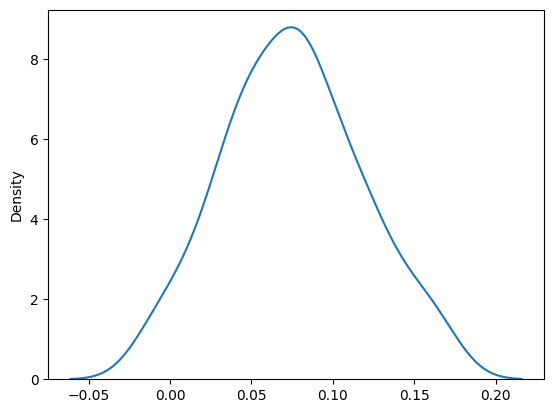

90% Confidence interval, rosiglitazone minus lifestyle:  0.006161732878471134 ,  0.14855379479842992


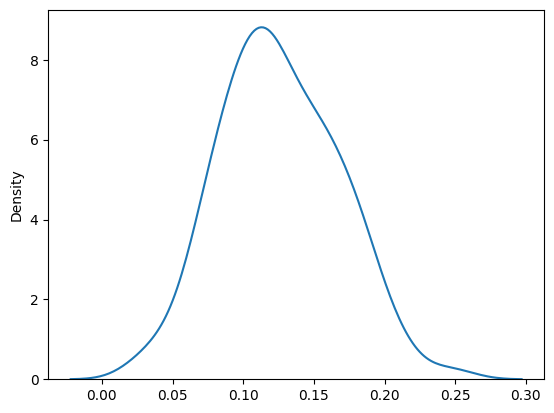

90% Confidence interval, rosiglitazone minus metformin:  0.07018647328696172 ,  0.1910250480982685


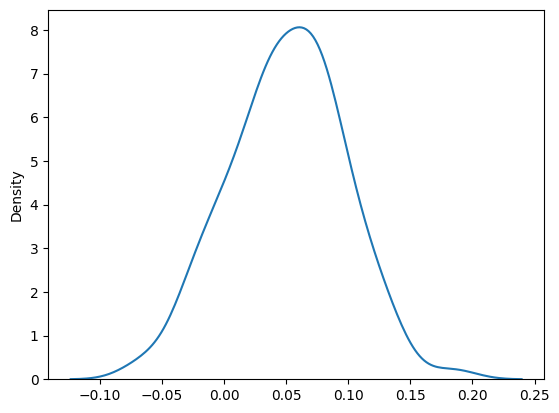

90% Confidence interval, lifestyle minus metformin:  -0.025941276156793387 ,  0.12868405540819328


In [18]:
# Part 4

rosi_versus_lifestyle = np.array(fx_ros)-np.array(fx_lif)
sns.kdeplot(x=rosi_versus_lifestyle)
plt.show()
print('90% Confidence interval, rosiglitazone minus lifestyle: ', np.quantile(rosi_versus_lifestyle,.05), ', ', np.quantile(rosi_versus_lifestyle,.95))

rosi_versus_met = np.array(fx_ros)-np.array(fx_met)
sns.kdeplot(x=rosi_versus_met)
plt.show()
print('90% Confidence interval, rosiglitazone minus metformin: ', np.quantile(rosi_versus_met,.05), ', ', np.quantile(rosi_versus_met,.95))

lif_versus_met = np.array(fx_lif)-np.array(fx_met)
sns.kdeplot(x=lif_versus_met)
plt.show()
print('90% Confidence interval, lifestyle minus metformin: ', np.quantile(lif_versus_met,.05), ', ', np.quantile(lif_versus_met,.95))

Rosi seems to outperform Lifestyle, since the 90% confidence interval doesn’t include zero. We’re 90% sure the difference in effect sizes is somewhere between 0.006 and 0.16. Rosi also looks better than Metformin, with a 90% confidence interval for the difference between 0.057 and 0.187, which doesn’t include zero either. However, there’s no clear winner between Lifestyle and Metformin—the 90% confidence interval includes zero, ranging from -0.03 to 0.125.

Part 5
My answer will be slightly biased by my Kinesiology major, but I'd argue that lifestyle change is safer and more effective than relying on drugs to manage diabetes, even though Rosiglitazone was best supported by the data. Medications can (and typically do!) have long-term effects that this study might not capture, like damage to other body systems or interference with other body processes. Lifestyle changes also tend to be the most accessible from a time and financial standpoint, though this is a true blanket statement for everyone. It's almost always prefereable to create a lifestyle change than have a patient use medication if a lifestyle change is feasible for the patient to accomplish.

That said, if lifestyle changes don’t work or aren’t feasible due to medical reasons, Rosiglitazone seems to be the better option compared to Metformin, as it reduces insulin resistance more effectively.

It's honestly a complex answer that would require more data than this one exercise shows, and it would also require information about individual patients, but that being said this is the treatment I would say is most effective overall given the analysis here and my prior classes.